## Observations and Insights 

The next observations can be drawn from this exercise:

-Analyzing the Tumor Volume's mean, we can appreciate that Ramicane drug regimen had de smallest sized tumor in average (40.21) and Ketapril regimen had the biggest (55.23).

-Capomulin and Ramicane drug treatment had the most observations.

-Mice sex was very similar in proportion, since 50.2% were male and 49.8% were female.

-Analyzing the last Timepoint in Capomulin, Ramicane, Infubinol, and Ceftamin treatments, we can have more proof that Ramicane seems to be the best treatment.

-Capomulin seems to be a great treatment too, since the Tumor Volume seems to reduce increasing the timepoints.

-Also, the biggest the weight on the mouse, the biggest the Tumor Volume is, stablishing a positive correlation.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
total_observations = len(combined_data["Mouse ID"])
total_observations

1893

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Removing the duplicate data from the combined_data
combined_data = combined_data[combined_data["Mouse ID"].isin(duplicate_data)==False]
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

unique_mice = combined_data.drop_duplicates("Mouse ID")

# Checking the number of mice in the clean DataFrame.

mice_number = len(unique_mice["Mouse ID"])
mice_number

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dv = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

stats_summary_df = pd.DataFrame({"Mean": mean, "Median": med, "Variance": var, "Standard Deviation": std_dv, "SEM": sem})
stats_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

stats_summary_df = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
stats_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

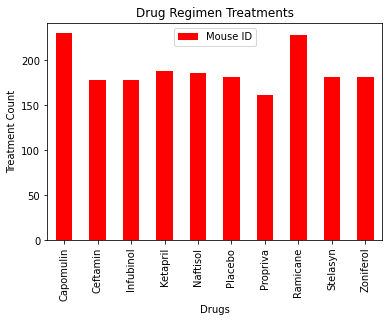

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_df = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()[["Drug Regimen", "Mouse ID"]]
drug_regimen_df = drug_regimen_df.set_index("Drug Regimen")

drug_regimen_df.plot(kind="bar", color="r")

plt.title("Drug Regimen Treatments")
plt.xlabel("Drugs")
plt.ylabel("Treatment Count")

plt.show()

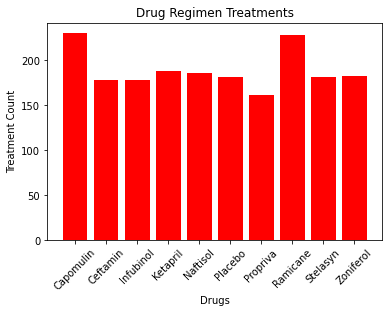

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_list = combined_data["Drug Regimen"].drop_duplicates().sort_values(ascending= True)
regimen_list = regimen_list.tolist()

regimen_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

plt.bar(regimen_list, regimen_count, color="r", alpha=1, align="center")

plt.title("Drug Regimen Treatments")
plt.xlabel("Drugs")
plt.ylabel("Treatment Count")

plt.xticks(rotation=45)
plt.show()

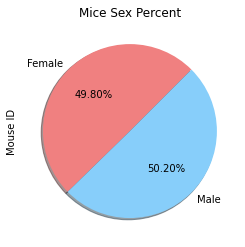

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame(unique_mice.groupby(["Sex"]).count()).reset_index()[["Sex","Mouse ID"]]

colors = ["lightcoral", "lightskyblue"]

sex_df.plot(kind="pie", y = "Mouse ID", autopct = '%1.2f%%', shadow=True, labels = sex_df["Sex"], colors=colors, 
            legend = False, startangle=45)

plt.title("Mice Sex Percent")
plt.show()

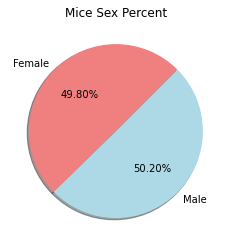

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (unique_mice.groupby(["Sex"])["Mouse ID"].count()).tolist()

labels = ["Female", "Male"]
colors = ["lightcoral", "lightblue"]

plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=45)

plt.title("Mice Sex Percent")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = combined_data.groupby("Mouse ID").max()

max_timepoint = max_timepoint[["Timepoint"]].copy()
max_timepoint = max_timepoint.rename(columns={"Timepoint":"Max Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_data, max_timepoint, on="Mouse ID", how="outer")

merged_df = merged_df.sort_values("Timepoint", ascending = False)
merged_df = merged_df.drop_duplicates(subset="Mouse ID", keep="first")
merged_df = merged_df.sort_values("Mouse ID", ascending = True)

merged_df = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

merged_df = merged_df.reset_index()[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Max Timepoint"]]
merged_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Max Timepoint
0,Infubinol,a203,67.973419,45
1,Infubinol,a251,65.525743,45
2,Ceftamin,a275,62.999356,45
3,Ramicane,a411,38.407618,45
4,Ramicane,a444,43.047543,45
...,...,...,...,...
95,Ceftamin,y769,68.594745,45
96,Capomulin,y793,31.896238,45
97,Ceftamin,y865,64.729837,45
98,Ramicane,z578,30.638696,45


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df.drop_duplicates("Drug Regimen")["Drug Regimen"].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor Volume is: 37.19
The upper quartile of Tumor Volume is: 59.93
The interquartile range of Tumor Volume is: 22.74
The the median of Tumor Volume is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.


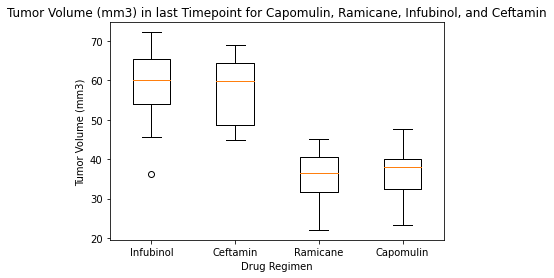

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plots = merged_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
box_plots = box_plots.to_frame()

box_plots = box_plots.reset_index()
box_plots = box_plots.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
box_plots = pd.DataFrame(box_plots)
box_plots = box_plots.reindex(treatments)
box_plots = [vol for vol in box_plots["Tumor Volume (mm3)"]]

plt.boxplot(box_plots, labels = treatments)
plt.title("Tumor Volume (mm3) in last Timepoint for Capomulin, Ramicane, Infubinol, and Ceftamin")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

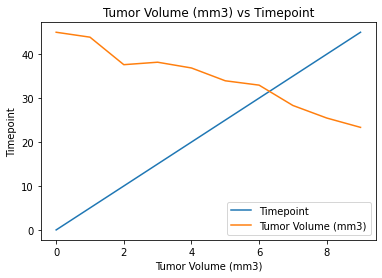

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selected_mouse = combined_data.groupby("Drug Regimen").get_group("Capomulin").iloc[1, 0]

line_plot = combined_data[combined_data["Mouse ID"].isin([selected_mouse])]
line_plot = line_plot.reset_index()[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot.plot.line()
plt.title("Tumor Volume (mm3) vs Timepoint")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

plt.show()

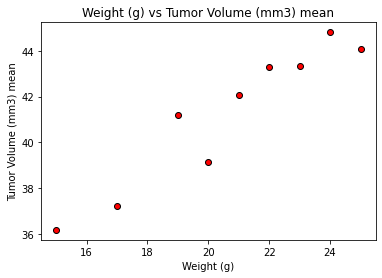

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]
scatter_plot = scatter_plot.reset_index()[["Tumor Volume (mm3)", "Weight (g)"]]

scatter_plot = scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

x_axis = scatter_plot.index.tolist()
y_axis = scatter_plot.tolist()

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Weight (g) vs Tumor Volume (mm3) mean")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3) mean")

plt.show()

## Correlation and Regression

Weight (g) vs Tumor Volume (mm3) mean correlation is 0.84


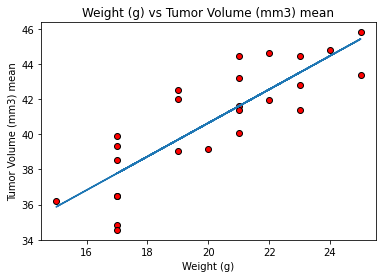

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_regr = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"),:]

x_axis = corr_regr.groupby(corr_regr["Mouse ID"])["Weight (g)"].mean()
y_axis = corr_regr.groupby(corr_regr["Mouse ID"])["Tumor Volume (mm3)"].mean()

corr_value = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"Weight (g) vs Tumor Volume (mm3) mean correlation is {corr_value}")

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Weight (g) vs Tumor Volume (mm3) mean")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3) mean")
plt.plot(x_axis,fit,"-")

plt.show()